## Multilayer perceptron

A multilayer perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected nodes, or neurons. Each neuron in one layer is connected to the neurons in the next layer, forming a feedforward network. MLPs are commonly used for tasks such as classification and regression. They are known for their ability to learn complex patterns and relationships in data, making them a powerful tool in machine learning.

### Name: Aadityaa.N Reg.No: 21BCE1964

#### Importing modules

The below script imports necessary libraries for banknote authentication using a multilayer perceptron.
It includes pandas for data manipulation, matplotlib for data visualization, tensorflow for building the neural network model,
numpy for numerical operations, LabelEncoder for encoding categorical variables, shuffle for shuffling the dataset,
and train_test_split for splitting the dataset into training and testing sets.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

The below script imports necessary libraries for banknote authentication using a multilayer perceptron.
It includes pandas for data manipulation, matplotlib for data visualization, tensorflow for building the neural network model,
numpy for numerical operations, LabelEncoder for encoding categorical variables, shuffle for shuffling the dataset,
and train_test_split for splitting the dataset into training and testing sets.

In [3]:
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels =len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels]=1
  return one_hot_encode


### Datset importing

In [ ]:
dataset = pd.read_csv('BankNote_Authentication.csv')

Displaying the coloumns

In [5]:
dataset.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [6]:
features = dataset[dataset.columns[0:4]].values
class_label = dataset[dataset.columns[4]].values
Y = one_hot_encode(class_label)

In [7]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

### The shuffle() function takes three arguments:

The first argument is the array that you want to shuffle, which in this case is features.
The second argument is the array that you want to shuffle in the same order as the first array, which is Y in this case.
The third argument is random_state, which is set to 1. This argument is used to initialize the random number generator, ensuring that the shuffling is reproducible. By setting it to a specific value, you can obtain the same shuffled order every time you run the code with the same random state.

In [8]:
X,Y = shuffle(features,Y,random_state=1)



In [9]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42)
print(train_x.shape)
print(test_x.shape)

(1097, 4)
(275, 4)


In [10]:
learning_rate =0.3
training_epochs = 1000
cost_history = np.empty([1],dtype=float)
n_dim = X.shape[1]
n_class=2

n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60
print(n_dim)


4


In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [12]:
x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b =tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None,n_class])


In [13]:
def multilayer_perceptron(x,weights,biases):
  layer1 = tf.add(tf.matmul(x,weights['h1']),bias['b1'])
  layer1 = tf.nn.sigmoid(layer1)

  layer2 = tf.add(tf.matmul(layer1,weights['h2']),bias['b2'])
  layer2 = tf.nn.sigmoid(layer2)

  layer3 = tf.add(tf.matmul(layer2,weights['h3']),bias['b3'])
  layer3 = tf.nn.sigmoid(layer3)

  layer4 = tf.add(tf.matmul(layer3,weights['h4']),bias['b4'])
  layer4 = tf.nn.relu(layer4)
  
  out_layer = tf.matmul(layer4,weights['out'])+ bias['out']

  return (out_layer)

In [14]:
weights={
    'h1': tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}

In [15]:
bias ={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [16]:
init = tf.global_variables_initializer()

y = multilayer_perceptron(x,weights,bias)


In [17]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_function) 
sess = tf.Session()
sess.run(init)
mse_history=[]
accuracy_history=[]

In [18]:
for epoch in range(training_epochs):
  sess.run(training_step,feed_dict={x:train_x,y_:train_y})
  cost = sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
  cost_history = np.append(cost_history,cost)
  correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  pred_y = sess.run(y,feed_dict={x:test_x})
  mse = tf.reduce_mean(tf.square(pred_y-test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = sess.run(accuracy,feed_dict={x:train_x,y_:train_y})
  accuracy_history.append(accuracy)
  print('epoch -',epoch,' -',' cost',cost,' - MSE',mse,' -train_accuracy',accuracy)


epoch - 0  -  cost 130.21092  - MSE Tensor("Mean_2:0", shape=(), dtype=float64)  -train_accuracy 0.54876935
epoch - 1  -  cost 4.2362447  - MSE Tensor("Mean_4:0", shape=(), dtype=float64)  -train_accuracy 0.45123062
epoch - 2  -  cost 3.3698127  - MSE Tensor("Mean_6:0", shape=(), dtype=float64)  -train_accuracy 0.54876935
epoch - 3  -  cost 0.6561304  - MSE Tensor("Mean_8:0", shape=(), dtype=float64)  -train_accuracy 0.61075664
epoch - 4  -  cost 0.59274757  - MSE Tensor("Mean_10:0", shape=(), dtype=float64)  -train_accuracy 0.6463081
epoch - 5  -  cost 0.5551383  - MSE Tensor("Mean_12:0", shape=(), dtype=float64)  -train_accuracy 0.66909754
epoch - 6  -  cost 0.52355105  - MSE Tensor("Mean_14:0", shape=(), dtype=float64)  -train_accuracy 0.69188696
epoch - 7  -  cost 0.4913099  - MSE Tensor("Mean_16:0", shape=(), dtype=float64)  -train_accuracy 0.71194166
epoch - 8  -  cost 0.4566339  - MSE Tensor("Mean_18:0", shape=(), dtype=float64)  -train_accuracy 0.73655427
epoch - 9  -  cost 0.4

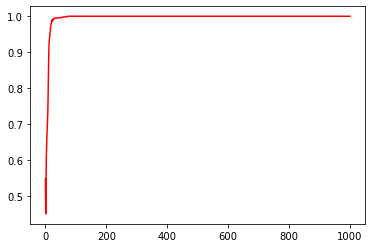

In [19]:
plt.plot(range(1000),accuracy_history,'r')
plt.show()

In [20]:
orrect_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Test accuracy',sess.run(accuracy,feed_dict={x:test_x,y_:test_y}))
pred_y = sess.run(y,feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y-test_y))
print('Mse:',sess.run(mse))


Test accuracy 1.0
Mse: 69.45466045540577


### Conclusion

Based on the evaluation of the model, the test accuracy is 1.0, indicating that the model is able to accurately classify the banknote authentication dataset. The mean squared error (MSE) is 69.45466045540577, which represents the average squared difference between the predicted and actual values.
